In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('projectData/RSCCASN.csv',parse_dates=True,index_col='DATE')

In [4]:
df.head()

,RSCCASN
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


In [3]:
df.columns = ['Sales']

<AxesSubplot:xlabel='DATE'>

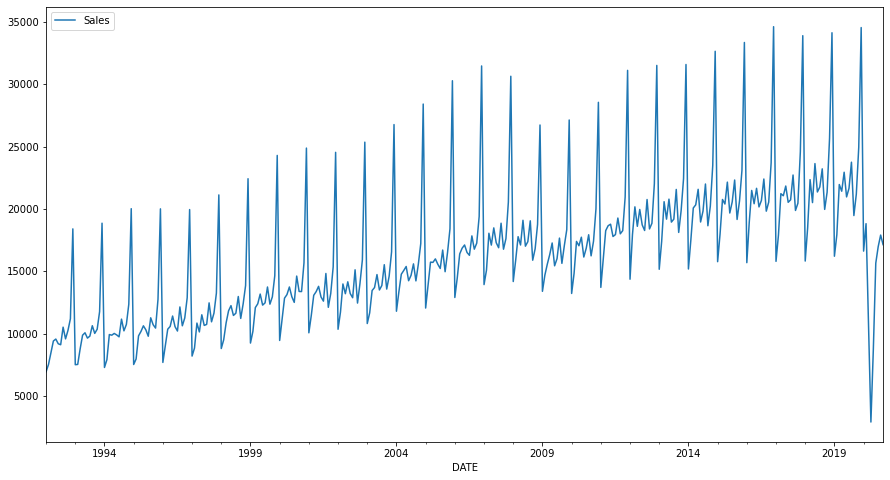

In [4]:

df.plot(figsize=(15,8))

In [5]:
len(df)

345

In [6]:
len(df) - 18

327

In [7]:
test_size  = 18
test_index = len(df) - test_size

In [8]:
train = df.iloc[:test_index]
test = df.iloc[test_index:]

In [9]:
train

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2018-11-01,25652
2018-12-01,34125
2019-01-01,16201


In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler()

In [12]:
scaler.fit(train)

MinMaxScaler()

In [13]:
scaler_train = scaler.transform(train)
scaler_test = scaler.transform(test)

In [14]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [16]:
len(test)

18

In [17]:
length = 12
generator = TimeseriesGenerator(scaler_train,scaler_train,length=length,batch_size=1)

In [18]:
X,y = generator[0]

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [20]:
n_feature = 1

In [21]:
model = Sequential()

model.add(LSTM(100,activation='relu',input_shape=(length,n_feature)))
model.add(Dense(1))

model.compile(optimizer ='adam',loss = 'mse')


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [23]:
from tensorflow.keras.callbacks import EarlyStopping

In [24]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [25]:
validation_genertor = TimeseriesGenerator(scaler_test,scaler_test,length=length,batch_size=1)

In [51]:
model.fit_generator(generator,epochs=20,validation_data=validation_genertor,callbacks=[early_stop])

Epoch 1/20
333/333 [==============================] - 1s 3ms/step - loss: 0.0024 - val_loss: 0.0596
Epoch 2/20
333/333 [==============================] - 1s 2ms/step - loss: 0.0020 - val_loss: 0.0527
Epoch 3/20
333/333 [==============================] - 1s 2ms/step - loss: 0.0019 - val_loss: 0.0361
Epoch 4/20
333/333 [==============================] - 1s 2ms/step - loss: 0.0018 - val_loss: 0.0426
Epoch 5/20
333/333 [==============================] - 1s 2ms/step - loss: 0.0019 - val_loss: 0.0389


In [52]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

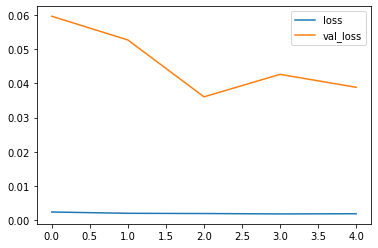

In [53]:
losses.plot()

In [54]:
test_predictions = []
first_eval_batch = scaler_train[-length:]
current_batch = first_eval_batch.reshape(1,length,n_feature)
for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,:,:],[[current_pred]],axis=1)

In [56]:
true_predictions = scaler.inverse_transform(test_predictions)

In [57]:
test['predictions'] = true_predictions

<ipython-input-57-fa6c3af7c69f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions'] = true_predictions


In [58]:
test

,Sales,predictions
DATE,,
2019-04-01,21416,20538.494921
2019-05-01,22938,20516.518616
2019-06-01,20960,20255.603704
2019-07-01,21650,19757.617351
2019-08-01,23743,19188.730673
2019-09-01,19464,18635.323158
2019-10-01,21177,18108.426257
2019-11-01,24928,17608.467999
2019-12-01,34541,17133.175457


<AxesSubplot:xlabel='DATE'>

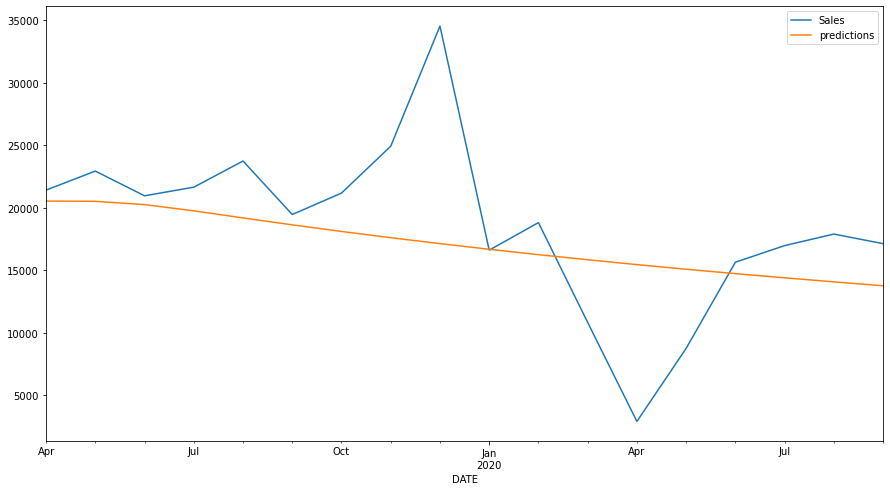

In [59]:
test.plot(figsize=(15,8))

In [60]:
full_scaler = MinMaxScaler()
scaled_full_data  = full_scaler.fit_transform(df)

In [61]:
length = 12
generator = TimeseriesGenerator(scaled_full_data,scaled_full_data,length=length,batch_size=1)

In [62]:
model = Sequential()

model.add(LSTM(100,activation='relu',input_shape=(length,n_feature)))
model.add(Dense(1))

model.compile(optimizer ='adam',loss = 'mse')


model.fit_generator(generator,epochs=20)

Epoch 1/20
333/333 [==============================] - 2s 2ms/step - loss: 0.0338
Epoch 2/20
333/333 [==============================] - 1s 2ms/step - loss: 0.0129
Epoch 3/20
333/333 [==============================] - 1s 2ms/step - loss: 0.0152
Epoch 4/20
333/333 [==============================] - 1s 2ms/step - loss: 0.0072
Epoch 5/20
333/333 [==============================] - 1s 2ms/step - loss: 0.0058
Epoch 6/20
333/333 [==============================] - 1s 2ms/step - loss: 0.0063
Epoch 7/20
333/333 [==============================] - 1s 2ms/step - loss: 0.0043
Epoch 8/20
333/333 [==============================] - 1s 2ms/step - loss: 0.0032
Epoch 9/20
333/333 [==============================] - 1s 2ms/step - loss: 0.0074
Epoch 10/20
333/333 [==============================] - 1s 2ms/step - loss: 0.0041
Epoch 11/20
333/333 [==============================] - 1s 2ms/step - loss: 0.0032
Epoch 12/20
333/333 [==============================] - 1s 2ms/step - loss: 0.0022
Epoch 13/20
333/333 [====

In [63]:
forecast = []
periods = 20
first_eval_batch = scaler_train[-length:]
current_batch = first_eval_batch.reshape(1,length,n_feature)
for i in range(periods):
    current_pred = model.predict(current_batch)[0]
    forecast.append(current_pred)
    current_batch = np.append(current_batch[:,:,:],[[current_pred]],axis=1)

In [64]:
forecast = scaler.inverse_transform(forecast)

In [65]:
df

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2020-05-01,8748
2020-06-01,15645
2020-07-01,16973


In [66]:
forecast

array([[20628.55265933],
       [20823.45206058],
       [20852.25127137],
       [20675.03138563],
       [20368.97214401],
       [19991.35527572],
       [19591.64911586],
       [19187.20246735],
       [18784.13145125],
       [18384.61497691],
       [17990.03527451],
       [17599.359795  ],
       [17211.824848  ],
       [16826.62715653],
       [16443.70321718],
       [16062.45675763],
       [15682.27748534],
       [15303.97774917],
       [14929.83212596],
       [14559.11238825]])

In [69]:
forecast_index = pd.date_range(start='2020-04-01',periods=periods,freq="MS")

In [70]:
forecast_index

DatetimeIndex(['2020-04-01', '2020-05-01', '2020-06-01', '2020-07-01',
               '2020-08-01', '2020-09-01', '2020-10-01', '2020-11-01',
               '2020-12-01', '2021-01-01', '2021-02-01', '2021-03-01',
               '2021-04-01', '2021-05-01', '2021-06-01', '2021-07-01',
               '2021-08-01', '2021-09-01', '2021-10-01', '2021-11-01'],
              dtype='datetime64[ns]', freq='MS')

In [71]:
forecast_df = pd.DataFrame(data=forecast,index=forecast_index,columns=['Forecast'])

<AxesSubplot:>

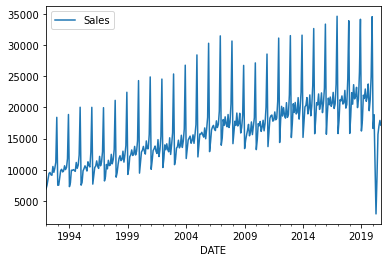

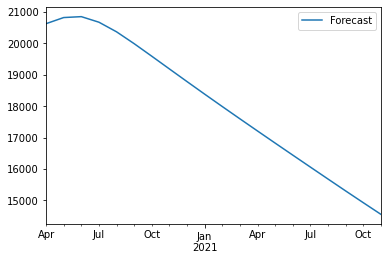

In [72]:
df.plot()
forecast_df.plot()

(603.0, 609.0)

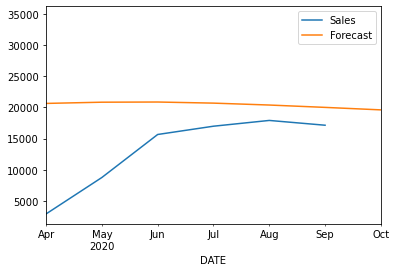

In [74]:
ax = df.plot()
forecast_df.plot(ax = ax)
plt.xlim('2020-04-11','2020-10-12')